About: Loan Defaulters Classifications with ensemble method
Dataset1: Dataset link - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Experimental Aim: To compare the performance of loan defaulters classifications with ensemble and dense aritificial neural network method

Results: Performance accuracy

Decision Tree: 82%
Support Vector Machine: 78%
Logistic Regression: 70%
Adaboost: 80%
ANN: 83%


Processses:
- data analysis
- outlier detection and removal
- one-hot-encoding of category variables
- balancing of an imbalance training data
- model training/fiting comparisom with ensemble method: Logistic Regression, Support Vector Machine,
                                                    Decision Tree and Adaboost classifiers
- model training/fitting with dense sequential neural network with class label weight
- Predictions

In [1]:
# set up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import clear_output
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets, linear_model

In [2]:
# upload data dataframe 
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1)
data = df.dropna()      # removing rows with null values if any 
data.head(2)    # print sample frame by rows
data.columns
#clear_output(wait=True)
#data.dtypes

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
# Features preporcessing and Analysis
# identify and separate category/ continous variables

num_var = data.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1)

cat_var = data.drop(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month'], axis =1)

cat_var.head(2)
cat_var.columns

Index(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

In [6]:
# perform one-hot encoding for category variables

df = pd.concat([data.drop('SEX', axis=1), pd.get_dummies(data['SEX'],prefix='sex')], axis=1)
df1 = pd.concat([df.drop('EDUCATION', axis=1), pd.get_dummies(data['EDUCATION'],prefix='education')], axis=1)
df2 = pd.concat([df1.drop('MARRIAGE', axis=1), pd.get_dummies(data['MARRIAGE'],prefix='marriage')], axis=1)
df4 = pd.concat([df2.drop('PAY_0', axis=1), pd.get_dummies(data['PAY_0'],prefix='PAY_0')], axis=1)
df5 = pd.concat([df4.drop('PAY_2', axis=1), pd.get_dummies(data['PAY_2'],prefix='PAY_2')], axis=1)
df6 = pd.concat([df5.drop('PAY_3', axis=1), pd.get_dummies(data['PAY_3'],prefix='PAY_3')], axis=1)
df7 = pd.concat([df2.drop('PAY_4', axis=1), pd.get_dummies(data['PAY_4'],prefix='PAY_4')], axis=1)
df8 = pd.concat([df2.drop('PAY_5', axis=1), pd.get_dummies(data['PAY_5'],prefix='PAY_5')], axis=1)
data1 = pd.concat([df2.drop('PAY_6', axis=1), pd.get_dummies(data['PAY_6'],prefix='PAY_6')], axis=1)

#visualisations
data1.head(2)
#data1.columns
#len(data)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,2,2,-1,-1,-2,3913,3102,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2682,1725,...,0,0,0,1,0,0,0,0,0,0


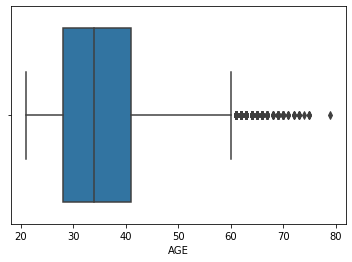

In [7]:
# check for outlier based on independent univariate variable approach and box plot

import seaborn as sns
sns.boxplot(x=data1['AGE'])


29728

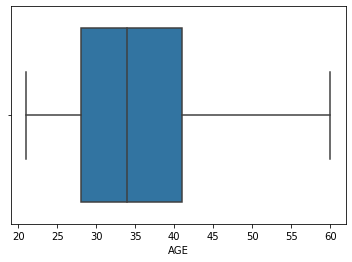

In [8]:
# remove outliers based on age variable

data2 = data1[data1.AGE <=60]
data2.shape[0]

#visualisations
import seaborn as sns
sns.boxplot(x=data2['AGE'])

data2.head(2)
data2.shape[0]

In [113]:
# separate train and test datasets
#len_data = 
input_sample = data2[data2['ID'] <=29900]          # training / validation testing
test_sample = data2[data2['ID']>29900]             # external test sample
test_sample.head(2)
#test_sample.shape[0]


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
29900,29901,20000,29,0,0,-2,-2,-2,16809,0,...,1,0,0,0,0,0,0,0,0,0
29901,29902,50000,29,1,2,0,0,0,50845,48750,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# rename and drop columns
input_sample1 = input_sample.rename(columns = { 'default payment next month': 'default_payment_next_month'})
input_data= input_sample1.drop(['ID'], axis =1)
train_input.columns


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default_payment_next_month', 'sex_1', 'sex_2',
       'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'marriage_0', 'marriage_1',
       'marriage_2', 'marriage_3', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8'],
      dtype='object')

In [16]:
# visualisation 2: look the percentage of defaulters by sex, or education or any of the categorical variable 
# checking for imbalance data by percentage, 0 being pay , 1 = defaulters

default_rate= pd.DataFrame(
    input_data.groupby('default_payment_next_month').count()['AGE']/input_data.shape[0]*100.00
)

print(default_rate)



                                  AGE
default_payment_next_month           
0                           77.933036
1                           22.066964


In [17]:
# check for imbalance label and weight distribution of training data

counts =input_data['default_payment_next_month'].value_counts()
print(counts)

imb_weight_for_0 = 1.0 / counts[0]
imb_weight_for_1 = 1.0 / counts[1]
print(imb_weight_for_0 )
print(imb_weight_for_1 )

0    23090
1     6538
Name: default_payment_next_month, dtype: int64
4.3308791684711995e-05
0.00015295197308045274


In [114]:
#train input features/target separation and normalisation

target_feat = 'default_payment_next_month'
train_feat = input_data.drop(target_feat, axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(train_feat)      # use this same normalisation to process new test cases
y = input_data[target_feat]


In [23]:
# undersampling train input/target to remove data imbalance

from imblearn.under_sampling import NearMiss
#from imblearn.under_sampling import SMOTE

nm = NearMiss()
x_train1, y_train1 = nm.fit_sample(X,y)

#check for class distribution
from collections import Counter

print( 'y_train {}'.format(Counter(y)))
print( 'y_train1 {}'.format(Counter(y_train1)))


y_train Counter({0: 23090, 1: 6538})
y_train1 Counter({0: 6538, 1: 6538})


42

In [115]:
# train and test data and the corresponding data target separation of balance dataset

x_train, x_test, y_train, y_test = train_test_split(x_train1,y_train1,test_size=0.15, random_state=42)


# create weight for the balance data label for dense neural network training
counts =y_train.value_counts()

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
print(weight_for_0)
print(weight_for_1)

x_test.shape[0]
x_train.shape[-1]

0.00017998560115190784
0.0001799208348326736


42

In [30]:
# Build and fit Logistic Regression model

logistic_mdl = LogisticRegression()
logistic_mdl.fit(x_train, y_train)

LogisticRegression()

In [26]:
# Logistic regression model inference with prediction accuracy on test dataset

y_predict_reg = logistic_mdl.predict(x_test)
print(accuracy_score(y_test,y_predict_reg))

# matrix visualisation of loan defaulters ( default payment: 1 = Yes , 0 = No)
pd.crosstab(y_test,y_predict_reg)


0.7849133537206932


col_0,0,1
default_payment_next_month,,
0,827,155
1,267,713


In [31]:
# Ensemble method of classification with multiple classifiers

estimators = []

#Decision Tree
dt_model = DecisionTreeClassifier(random_state=1)
estimators.append(('DecisionTreeClassifier',dt_model))

#SVM - Support Vector Classifier (SVC)
svm_model = SVC(random_state=1)
estimators.append(('SVC',svm_model))

#Logistic regression
logit_model = LogisticRegression(random_state=1)
estimators.append(('LogisticRegression',logit_model))

# Adaboost
ada_boost_model = AdaBoostClassifier(n_estimators = 500, random_state = 0)
estimators.append(('AdaBoostClassifier', ada_boost_model))

In [28]:
# ensemble classifiers training and fitting

#from sklearn.metrics import accuracy_score

for each_estimator in (svm_model, dt_model, logit_model, ada_boost_model):
    each_estimator.fit(x_train,y_train)
    y_predict_ensem = each_estimator.predict(x_test)
    print(each_estimator.__class__.__name__, accuracy_score(y_test,y_predict_ensem))
    
    
    # # matrix visualisation of loan defaulters ( default payment: 1 = Yes , 0 = No)
    print(each_estimator.__class__.__name__, pd.crosstab(y_test,y_predict_ensem))

SVC 0.8241590214067278
SVC col_0                         0    1
default_payment_next_month          
0                           889   93
1                           252  728
DecisionTreeClassifier 0.7400611620795107
DecisionTreeClassifier col_0                         0    1
default_payment_next_month          
0                           723  259
1                           251  729
LogisticRegression 0.7849133537206932
LogisticRegression col_0                         0    1
default_payment_next_month          
0                           827  155
1                           267  713
AdaBoostClassifier 0.8022426095820592
AdaBoostClassifier col_0                         0    1
default_payment_next_month          
0                           842  140
1                           248  732


In [158]:
# model a dense neural network classifier

from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(x_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               11008     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 142,849
Trainable params: 142,849
Non-trainable params: 0
________________________________________________

In [159]:
# compile

#metrics = [
    #keras.metrics.FalseNegatives(name="fn"),
    #keras.metrics.FalsePositives(name="fp"),
    #keras.metrics.TrueNegatives(name="tn"),
    #keras.metrics.TruePositives(name="tp"),
    #keras.metrics.Precision(name="precision"),
    #keras.metrics.Recall(name="recall"),
#]

#metrics= metrics
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics= ['accuracy']
)
class_weight = {0: weight_for_0, 1: weight_for_1}

In [160]:
# training with class weight

model.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=10,
    verbose=2,
    #callbacks=callbacks,
    #validation_data=(x_test, y_test),
    class_weight=class_weight,
)

Epoch 1/10
11/11 - 0s - loss: 1.0593e-04 - accuracy: 0.6723
Epoch 2/10
11/11 - 0s - loss: 8.8613e-05 - accuracy: 0.7796
Epoch 3/10
11/11 - 0s - loss: 8.2871e-05 - accuracy: 0.7958
Epoch 4/10
11/11 - 0s - loss: 7.8225e-05 - accuracy: 0.8071
Epoch 5/10
11/11 - 0s - loss: 7.5221e-05 - accuracy: 0.8217
Epoch 6/10
11/11 - 0s - loss: 7.3213e-05 - accuracy: 0.8250
Epoch 7/10
11/11 - 0s - loss: 7.1945e-05 - accuracy: 0.8286
Epoch 8/10
11/11 - 0s - loss: 7.0517e-05 - accuracy: 0.8352
Epoch 9/10
11/11 - 0s - loss: 6.9946e-05 - accuracy: 0.8335
Epoch 10/10
11/11 - 0s - loss: 7.0017e-05 - accuracy: 0.8344


In [161]:
# Dense neural network model inference for loan defaulters
# default payment: 1 = Yes , 0 = No)

x_test_r1 = x_test[[7],:]     # select a single row from test set based on index

y_predict_dense_model = model.predict(x_test_r1)   # predict a single row
#print(accuracy_score(y_test,y_predict_dense_model))
print(y_predict_dense_model)

#pd.crosstab(y_test,y_predict_dense_model)
print(
    "This particular customer indicated a %.1f percent probability "
    "to default loan re-payment, as evaluated by our model." % (100 * y_predict_dense_model[0][0],)
)


[[0.98251706]]
This particular customer indicated a 98.3 percent probability to default loan re-payment, as evaluated by our model.


In [162]:
# model inference and prediction using a dataframe test sample containing record of a particular customer
# default payment: 1 = Yes , 0 = No

test_sample_ID = test_sample[test_sample['ID'] == 29902]   # you can try different customer ID to predict payment outcome 

# convert to dictionary and print a customer details
sample_ID_dict = test_sample_ID.to_dict('record')
print(sample_ID_dict )

sample_ID = test_sample_ID.drop(['ID','default payment next month'], axis =1)

# normalise
scaler = StandardScaler()
sample_ID_norm = scaler.fit_transform(sample_ID)

# predict label for a new record with 
y_predict_sample_29901_norm = model.predict(sample_ID_norm)   # predict a single row
print(y_predict_sample_29901_norm)

#pd.crosstab(y_test,y_predict_dense_model)
print(
    "This particular customer indicated a %.1f percent probability "
    "to default loan re-payment, as evaluated by our model." % (100 * y_predict_sample_29901_norm[0][0],)
)


[{'ID': 29902, 'LIMIT_BAL': 50000, 'AGE': 29, 'PAY_0': 1, 'PAY_2': 2, 'PAY_3': 0, 'PAY_4': 0, 'PAY_5': 0, 'BILL_AMT1': 50845, 'BILL_AMT2': 48750, 'BILL_AMT3': 103486, 'BILL_AMT4': 50590, 'BILL_AMT5': 50248, 'BILL_AMT6': 49387, 'PAY_AMT1': 0, 'PAY_AMT2': 6556, 'PAY_AMT3': 3250, 'PAY_AMT4': 1563, 'PAY_AMT5': 1208, 'PAY_AMT6': 781, 'default payment next month': 0, 'sex_1': 1, 'sex_2': 0, 'education_0': 0, 'education_1': 0, 'education_2': 1, 'education_3': 0, 'education_4': 0, 'education_5': 0, 'education_6': 0, 'marriage_0': 0, 'marriage_1': 0, 'marriage_2': 1, 'marriage_3': 0, 'PAY_6_-2': 0, 'PAY_6_-1': 0, 'PAY_6_0': 1, 'PAY_6_2': 0, 'PAY_6_3': 0, 'PAY_6_4': 0, 'PAY_6_5': 0, 'PAY_6_6': 0, 'PAY_6_7': 0, 'PAY_6_8': 0}]
[[0.23241347]]
This particular customer indicated a 23.2 percent probability to default loan re-payment, as evaluated by our model.
